# Testing Subtractions

This series of tests is for cheecking presubtractions and their affect on the covariance maps.

In [1]:
# imports
import numpy as np
import pandas as pd
import numpy.ma as ma
import importlib
import matplotlib
from astropy.stats import sigma_clipped_stats
from importlib import reload
import time
from astropy.io import fits

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#personal
from pipeline.est_pipeline import *
from pipeline.code.file_reader import *
from pipeline.code.corr_plots import *
from pipeline.code.cluster import *

import pipeline.code.Estimator as es
import pipeline.code.Estimator_R as er
import pipeline.code.data_table as d_t
import pipeline.code.graph_code as gc

import pipeline.code.Correlator as Cor
from importlib import reload

In [4]:
## Setting up file paths for testing
out_dir = "/home/emcewen/code_dev/test_lengths/"
data_path = "/home/imaka/data/"

# aocb file:
date = '20210503'
aocb = 'aocb0001o'

# file construction
name = f'{date}_{aocb}'
file_path = f'{data_path}{date}/ao/{aocb}.fits'

In [5]:
## Correlate new data
reload(Cor)
# init object
curr_data = Cor.Correlator(name, file_path, out_dir, tmax=100, s_sub=True, tt_sub=True)

In [8]:
## Pull old correlation
reload(Cor)

# pull file
tmax = 200
cor_file = f"{out_dir}/fits/{name}_tmax{tmax}_stt_0.fits"

# init object
pull_data = Cor.Correlator("", "", "", f_file = cor_file)

## TEST: Average given current Functions

In [89]:
# Pull uncorrelated file
reload(Cor)
# Setting up a correlation without static or tip-tilt Subtractions
test_data = Cor.Correlator(name, file_path, out_dir, tmax=100, s_sub=False, tt_sub=False)

x_slopes, y_slopes = test_data.x_slopes, test_data.y_slopes

In [90]:
### Aquiring the subtracted Slopes

# pulling subtractions using the Corr object
x_tt, y_tt = test_data.get_tiptilt_sub()
x_s, y_s = test_data.get_statics_sub()

## TT then S
# setting the slopes to these subtracted slopes
test_data.x_slopes = x_tt
test_data.y_slopes = y_tt
x_tts, y_tts = test_data.get_statics_sub()

## S then TT
test_data.x_slopes = x_s
test_data.y_slopes = y_s
x_stt, y_stt = test_data.get_tiptilt_sub()

## Raw Slope Plots

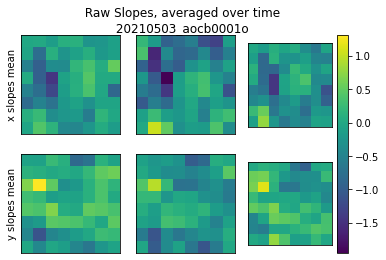

In [46]:
### PLOT: Mean over time, no subtraction

title = f" Raw Slopes, averaged over time\n {curr_data.name}"
row1_label = "x slopes mean"
row2_label = "y slopes mean"

mat_cube_1 = np.mean(x_slopes[:3], axis = 1)
mat_cube_2 = np.mean(y_slopes[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

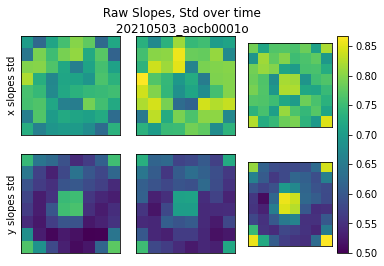

In [48]:
### PLOT: std over time, no subtraction

title = f" Raw Slopes, Std over time\n {curr_data.name}"
row1_label = "x slopes std"
row2_label = "y slopes std"

mat_cube_1 = np.std(x_slopes[:3], axis = 1)
mat_cube_2 = np.std(y_slopes[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

## TT only

what happens when tip and tilt are subtracted off?

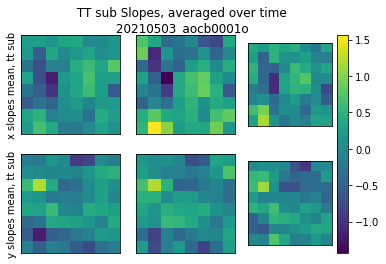

In [52]:
### PLOT: Mean over time, TT subtraction

title = f" TT sub Slopes, averaged over time\n {curr_data.name}"
row1_label = "x slopes mean, tt sub"
row2_label = "y slopes mean, tt sub"

mat_cube_1 = np.mean(x_tt[:3], axis = 1)
mat_cube_2 = np.mean(y_tt[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

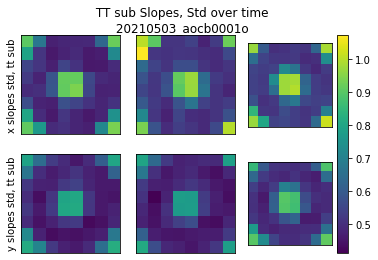

In [53]:
### PLOT: std over time, TT subtraction

title = f" TT sub Slopes, Std over time\n {curr_data.name}"
row1_label = "x slopes std, tt sub"
row2_label = "y slopes std, tt sub"

mat_cube_1 = np.std(x_tt[:3], axis = 1)
mat_cube_2 = np.std(y_tt[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

In [82]:
## PLOT: histogram of static subtractions

mask_8_8_center = [[0,0,1,1,1,1,0,0],
           [0,1,1,1,1,1,1,0],
           [1,1,1,1,1,1,1,1],
           [1,1,1,0,0,1,1,1],
           [1,1,1,0,0,1,1,1],
           [1,1,1,1,1,1,1,1],
           [0,1,1,1,1,1,1,0],
           [0,0,1,1,1,1,0,0]]

def to_sub_data_t_avg(mat):
    # incoming data expected as: (t, x, y)
    mask = ~np.array(mask_8_8_center, dtype=bool)
    mask_big = np.broadcast_to(mask,(mat.shape[0],)+mask.shape)
    mat_masked = np.ma.masked_array(mat, mask=mask_big)
    t_list = np.ma.average(mat_masked, axis=(1,2))
    return t_list

tts = to_sub_data_t_avg(x_tt[0])

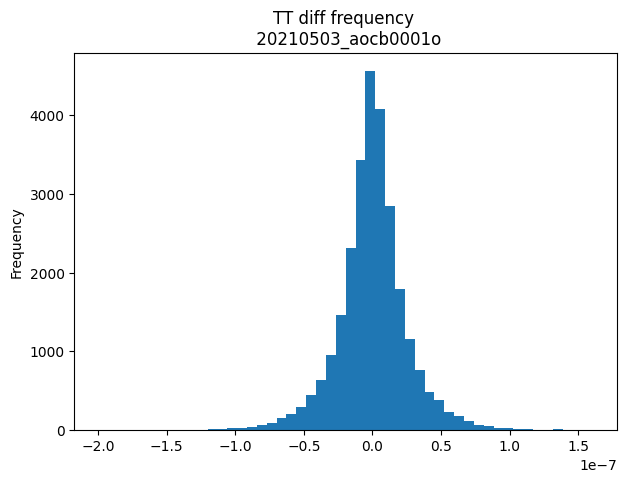

In [84]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(tts, bins=50)
plt.gca().set(title=f'TT diff frequency \n {name}', ylabel='Frequency');

## Static only
what happens when statics are subtracted off?

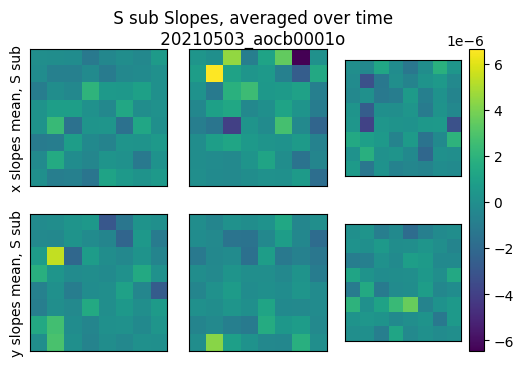

In [100]:
### PLOT: Mean over time, TT subtraction

title = f" S sub Slopes, averaged over time\n {curr_data.name}"
row1_label = "x slopes mean, S sub"
row2_label = "y slopes mean, S sub"

mat_cube_1 = np.average(x_s[:3], axis = 1)
mat_cube_2 = np.average(y_s[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

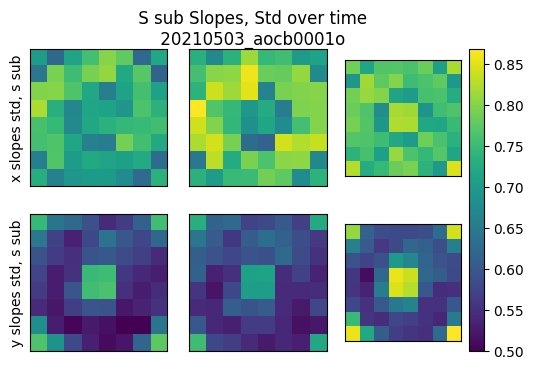

In [101]:
### PLOT: std over time, S subtraction

title = f" S sub Slopes, Std over time\n {curr_data.name}"
row1_label = "x slopes std, s sub"
row2_label = "y slopes std, s sub"

mat_cube_1 = np.std(x_s[:3], axis = 1)
mat_cube_2 = np.std(y_s[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2]
label_list = [row1_label, row2_label]

plot_assist(mat_list, label_list, title=title).show()

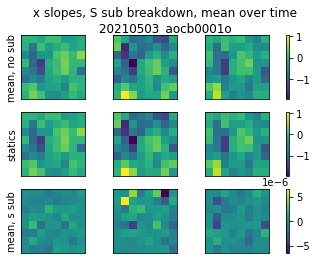

In [74]:
### PLOT: mean over time, S subtraction

title = f" x slopes, S sub breakdown, mean over time\n {curr_data.name}"
row1_label = "mean, no sub"
row2_label = "statics"
row3_label = "mean, s sub"

mat_cube_1 = np.mean(x_slopes[:3], axis = 1)
mat_cube_2 = np.average(x_slopes[:3]-x_s[:3], axis = 1)
mat_cube_3 = np.mean(x_s[:3], axis = 1)

mat_list = [mat_cube_1, mat_cube_2, mat_cube_3]
label_list = [row1_label, row2_label, row3_label]

plot_assist_col(mat_list, label_list, title=title).show()

## Order of subtraction

What happens when we subtract both

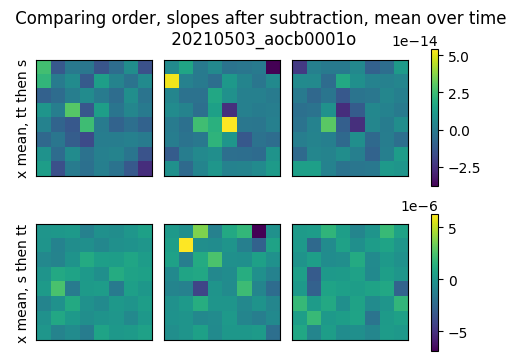

In [91]:
### PLOT: Mean given order of subtraction

title = f" Comparing order, slopes after subtraction, mean over time \n {curr_data.name}"

mat_cube_1 = np.mean(x_tts[:3], axis = 1)
mat_cube_2 = np.mean(x_stt[:3], axis = 1)
mat_list = [mat_cube_1, mat_cube_2]

row1_label = "x mean, tt then s"
row2_label = "x mean, s then tt"
label_list = [row1_label, row2_label]

plot_assist_col(mat_list, label_list, title=title).show()

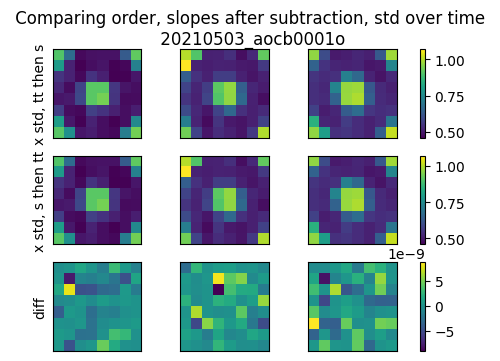

In [104]:
### PLOT: Mean given order of subtraction

title = f" Comparing order, slopes after subtraction, std over time \n {curr_data.name}"

mat_cube_1 = np.std(x_tts[:3], axis = 1)
mat_cube_2 = np.std(x_stt[:3], axis = 1)
mat_cube_3 = np.std(x_stt[:3], axis = 1) - np.std(x_tts[:3], axis = 1)
mat_list = [mat_cube_1, mat_cube_2, mat_cube_3]

row1_label = "x std, tt then s"
row2_label = "x std, s then tt"
row3_label = "diff"                   
label_list = [row1_label, row2_label, row3_label]

plot_assist_col(mat_list, label_list, title=title).show()

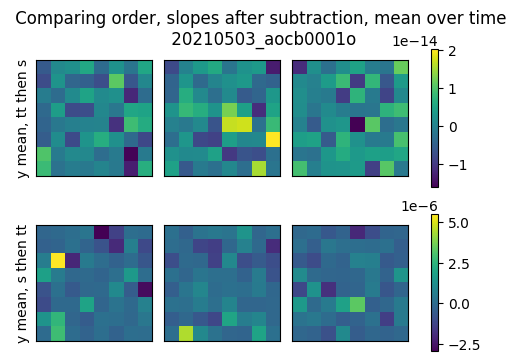

In [95]:
### PLOT: Mean given order of subtraction

title = f" Comparing order, slopes after subtraction, mean over time \n {curr_data.name}"

mat_cube_1 = np.average(y_tts[:3], axis = 1)
mat_cube_2 = np.average(y_stt[:3], axis = 1)
mat_list = [mat_cube_1, mat_cube_2]

row1_label = "y mean, tt then s"
row2_label = "y mean, s then tt"
label_list = [row1_label, row2_label]

plot_assist_col(mat_list, label_list, title=title).show()

## Test: Deconstructing Functions

The above makes it seem as though order in presubtractions matter. Deconstructing subtraction functions for further investigations.

In [ ]:
x_slopes, y_slopes = test_data.x_slopes, test_data.y_slopes

## Helper Functions

In [63]:
## Ploting function

def plot_assist(mat_list, label_list, title="None"):
    min_val = np.min(mat_list)
    max_val = np.max(mat_list)

    n_len = len(mat_list)
    n_width = mat_list[0].shape[0]

    fig, axes = plt.subplots(nrows=n_len, ncols=n_width, figsize=(2*n_width,4), gridspec_kw={"width_ratios":[1 for n in range(n_width)]})
    fig.subplots_adjust(wspace=0.1)
    fig.suptitle(str(title))

    for j in range(n_width):
        for i in range(n_len):
            ax = axes[i][j]
            try:
                im = ax.matshow(mat_list[i][j], vmax = max_val, vmin = min_val)
            except:
                print("error")
            ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            ax.set_yticklabels([])
            ax.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

            if j == 0:
                ax.set_ylabel(label_list[i])
    fig.colorbar(im, ax=axes[:, n_width-1])
    return fig

In [67]:
## Ploting function

def plot_assist_col(mat_list, label_list, title=""):
    min_val = np.min(mat_list, axis=(1,2,3))
    max_val = np.max(mat_list, axis=(1,2,3))

    n_len = len(mat_list)
    n_width = mat_list[0].shape[0]

    fig, axes = plt.subplots(nrows=n_len, ncols=n_width, figsize=(2*n_width,4), gridspec_kw={"width_ratios":[1 for n in range(n_width)]})
    fig.subplots_adjust(wspace=0.1)
    fig.suptitle(str(title))

    for i in range(n_len):
        for j in range(n_width):
            ax = axes[i][j]
            try:
                im = ax.matshow(mat_list[i][j], vmax = max_val[i], vmin = min_val[i])
            except:
                print("error")
            ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            ax.set_yticklabels([])
            ax.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

            if j == 0:
                ax.set_ylabel(label_list[i])
        fig.colorbar(im, ax=axes[i, :])
    return fig